In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt
from random import random

In [45]:
companies = ['goog','mo','dal','axp','APD', 'fb']
start = datetime(2016, 1, 1)
end = datetime(2019, 5, 1)
df = dr.data.get_data_yahoo(companies, start, end, interval='m')
data = df[['Adj Close']]
log_data = np.log(data)
df = log_data['Adj Close'].diff()
ndata = 100*df
ndata = ndata.dropna()

In [46]:
mean_ret = df.mean()
std_dev = df.std()
covarmat = df.cov()
corrmat = df.corr()
row,col = df.shape

In [47]:
portfolios = []
portweights = []
portreturn = []
portstd = []
portsharpe = []
nports = 100000
for i in range(0, nports):
    w = [random() for i in range(0,len(companies))]
    #w = [random()]*(len(companies))
    s = sum(w)
    weight = [ i/s for i in w ]
    portweights.append(weight)
    
for j in range(0, nports):
    portfolio_ret = np.dot(portweights[j], mean_ret)
    portreturn.append(portfolio_ret)
    variance = np.dot(np.transpose(portweights[j]), np.dot(covarmat, portweights[j]))
    stdev = np.sqrt(variance)
    portstd.append(stdev)
    sharperatio = portfolio_ret/stdev
    portsharpe.append(sharperatio)

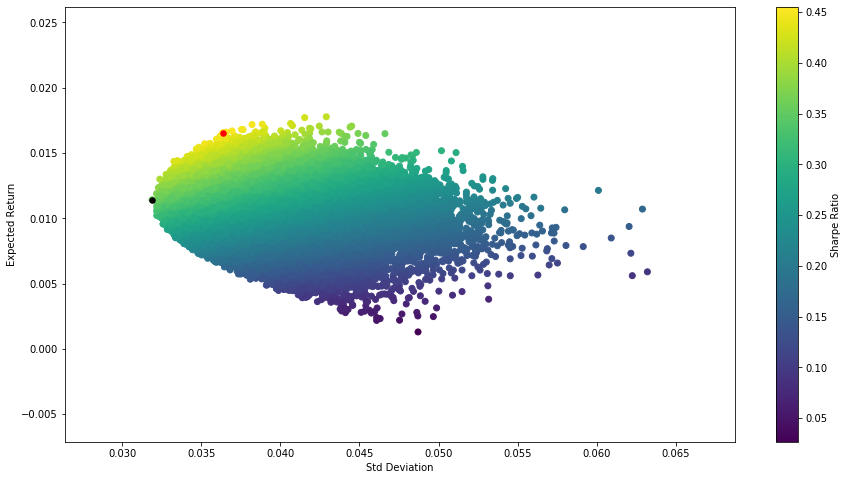

In [48]:
plt.figure(figsize = (15,8))
plt.scatter(portstd, portreturn, c=portsharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Std Deviation')
plt.ylabel('Expected Return')
opt = np.argmax(portsharpe)
line = np.argmin(portstd)
plt.scatter(portstd[opt], portreturn[opt], c='red', s=30)
plt.scatter(portstd[line], portreturn[line], c='black', s=30)
plt.show()

In [32]:
print('The Optimal weights are:')
for i in range(0, len(companies)):
    print('%f : %s' %(portweights[opt][i], companies[i]))

The Optimal weights are:
0.377234 : goog
0.002218 : mo
0.364706 : dal
0.001799 : axp
0.023622 : APD
0.159246 : aa
0.071175 : fb


[0.37723446547260203,
 0.0022181228819889783,
 0.364705789925246,
 0.001798741223399858,
 0.023621625411031244,
 0.15924634986394182,
 0.07117490522179006]